In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd


In [18]:
cartel_df = pd.read_excel('./transformed_data/cartel_data_with_centrality_measures.xlsx')

distinct_cartel_df = cartel_df.drop_duplicates(subset=["case"])

# Take only the features that we want to use
features = distinct_cartel_df[["number_of_firms", "number_of_cartel_firms", "sector", "subsector", "cartel_degree_centrality", "cartel_betweenness_centrality", "cartel_closeness_centrality", "cartel_eigenvector_centrality", "cartel_pagerank", "cartel_harmonic_centrality"]]
target = distinct_cartel_df["duration"]

combined_features_and_target = pd.merge(features, target, left_index=True, right_index=True)

# check types of features if categorical or numerical
print(features.dtypes)

combined_features_and_target.head()

number_of_firms                    int64
number_of_cartel_firms           float64
sector                             int64
subsector                          int64
cartel_degree_centrality         float64
cartel_betweenness_centrality    float64
cartel_closeness_centrality      float64
cartel_eigenvector_centrality    float64
cartel_pagerank                  float64
cartel_harmonic_centrality       float64
dtype: object


,number_of_firms,number_of_cartel_firms,sector,subsector,cartel_degree_centrality,cartel_betweenness_centrality,cartel_closeness_centrality,cartel_eigenvector_centrality,cartel_pagerank,cartel_harmonic_centrality,duration
0,6,12.0,3,3,0.019802,0.035391,0.080578,1.408994e-04,0.007593,30.213095,14
6,2,3.0,3,4,0.016502,0.000229,0.016973,7.140057e-13,0.006984,5.500000,6
8,1,2.0,3,5,0.003300,0.000000,0.003300,4.317360e-37,0.003289,1.000000,7
9,4,7.0,3,3,0.013201,0.004002,0.056937,7.167807e-05,0.005473,21.963492,7
13,8,42.0,3,4,0.029703,0.001137,0.028524,3.739372e-09,0.014910,9.833333,6


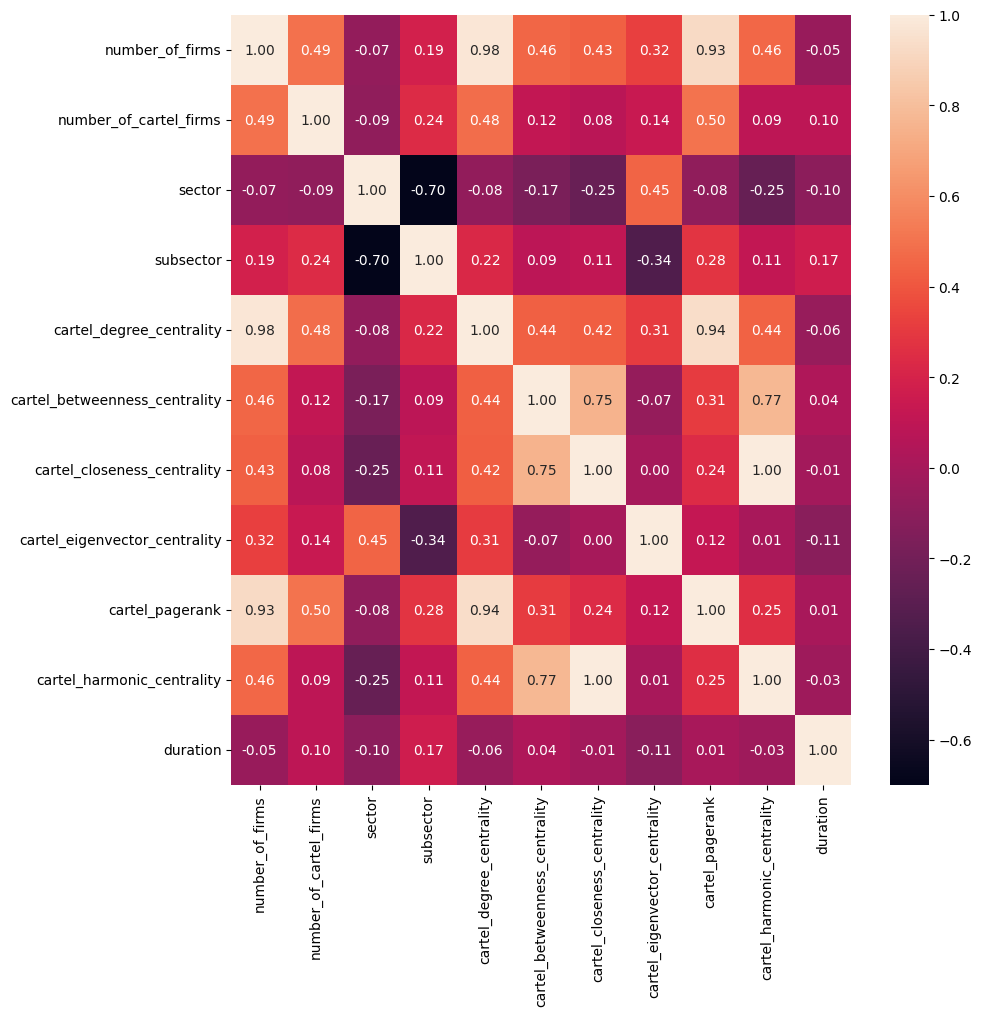

In [19]:
variable_correlations = combined_features_and_target.corr()

#build the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(variable_correlations, annot=True, fmt=".2f")
plt.show()

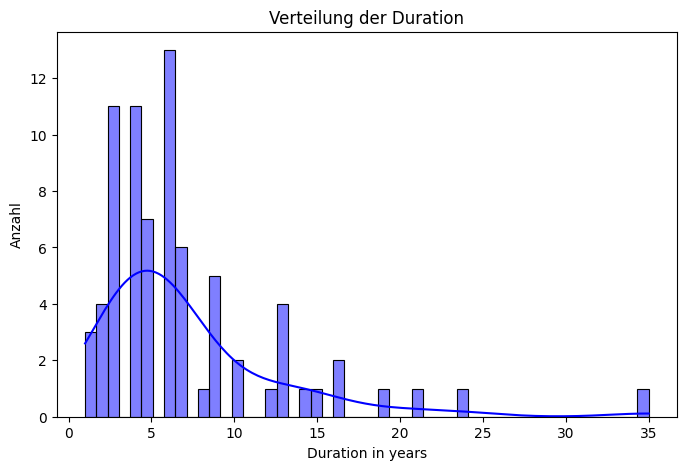

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(target, bins=50, kde=True, color="blue")
plt.xlabel("Duration in years")
plt.ylabel("Anzahl")
plt.title("Verteilung der Duration")
plt.show()

In [6]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [8]:
target_predictions = model.predict(features_test)

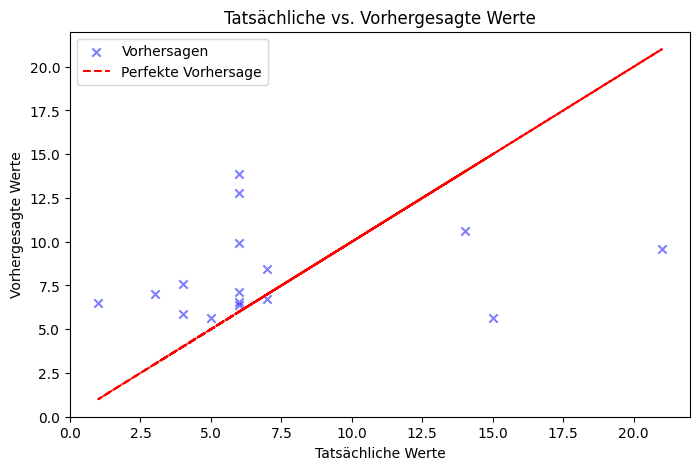

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(target_test, target_predictions, marker='x', alpha=0.5, color="blue", label="Vorhersagen")
plt.plot(target_test, target_test, color="red", linestyle="--", label="Perfekte Vorhersage")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.title("Tatsächliche vs. Vorhergesagte Werte")
plt.legend()
plt.show()

In [10]:
r2 = r2_score(target_test, target_predictions)
mae = mean_absolute_error(target_test, target_predictions)
mse = mean_squared_error(target_test, target_predictions)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error (MSE): {mse}")

feature_importance = pd.DataFrame({
    "Feature": features.columns,
    "Koeffizient": model.coef_
}).sort_values(by="Koeffizient", ascending=False)

print(feature_importance)

R² Score: -0.0802750255595901
Mean Absolute Error: 3.878656262638462
Mean Squared Error (MSE): 26.158690950952728
                         Feature  Koeffizient
8                cartel_pagerank  1876.995173
6    cartel_closeness_centrality   389.960133
5  cartel_betweenness_centrality   195.048793
7  cartel_eigenvector_centrality    14.607528
3                      subsector     0.445945
1         number_of_cartel_firms     0.140669
2                         sector    -0.265599
0                number_of_firms    -0.907922
9     cartel_harmonic_centrality    -0.988800
4       cartel_degree_centrality  -660.139279
